In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from warnings import filterwarnings
import matplotlib.pyplot as plt

# todo: explain how to pip install DatasetsEvaluator, point to github page

# todo: put back when done -- update datasets evaluator on pypi and retest -- i added the drop=True
#from DatasetsEvaluator import DatasetsEvaluator as de

# Todo: remove once have pip install
import sys  
sys.path.insert(0, 'C:\python_projects\RotationFeatures_project\RotationFeatures')
from RotationFeatures import RotationFeatures # todo: fix once have pip install

sys.path.insert(0, 'C:\python_projects\DatasetsEvaluator_project\DatasetsEvaluator')
import DatasetsEvaluator as de

filterwarnings('ignore')
np.random.seed(0)

## Define the set of datasets on openml we will test against

In [2]:
datasets_tester = de.DatasetsTester()

matching_datasets = datasets_tester.find_datasets( 
    problem_type = "classification",
    min_num_classes = 2,
    max_num_classes = 20,
    min_num_minority_class = 5,
    max_num_minority_class = np.inf,
    min_num_features = 0,
    max_num_features = np.inf,
    min_num_instances = 500,
    max_num_instances = 5_000,
    min_num_numeric_features = 2,
    max_num_numeric_features = 50,
    min_num_categorical_features=0,
    max_num_categorical_features=50)

## Collect the datasets and run the tests

In [3]:
# todo: get this working, then update datasetsEvaluator & this on github & pypi
cache_folder = "c:\dataset_cache"
datasets_tester.collect_data(max_num_datasets_used=50, 
                             preview_data=False, 
                             save_local_cache=True,
                             check_local_cache=True,
                             path_local_cache=cache_folder)
 

pipe1 = Pipeline([('dt', tree.DecisionTreeClassifier(random_state=0))])
pipe2 = Pipeline([('rota', RotationFeatures()), ('dt', tree.DecisionTreeClassifier(random_state=0))])

# This provides an example using some non-default parameters. 
summary_df = datasets_tester.run_tests(estimators_arr = [
                                        ("DT", "Original Features", "Default", pipe1),
                                        ("DT", "Rotation-based Features", "Default", pipe2)],
                                       num_cv_folds=3,
                                       show_warnings=False) 

display(summary_df)


Reading from local cache: 0, id: 15, name: breast-w
Reading from local cache: 1, id: 29, name: credit-approval
Reading from local cache: 2, id: 31, name: credit-g
Reading from local cache: 3, id: 37, name: diabetes
Reading from local cache: 4, id: 38, name: sick
Reading from local cache: 5, id: 181, name: yeast
Reading from local cache: 6, id: 185, name: baseball
Reading from local cache: 7, id: 311, name: oil_spill
Reading from local cache: 8, id: 451, name: irish
Reading from local cache: 9, id: 470, name: profb
Reading from local cache: 10, id: 679, name: rmftsa_sleepdata
Reading from local cache: 11, id: 715, name: fri_c3_1000_25
Reading from local cache: 12, id: 717, name: rmftsa_ladata
Reading from local cache: 13, id: 723, name: fri_c4_1000_25
Reading from local cache: 14, id: 728, name: analcatdata_supreme
Reading from local cache: 15, id: 737, name: space_ga
Reading from local cache: 16, id: 740, name: fri_c3_1000_10
Reading from local cache: 17, id: 743, name: fri_c1_1000_5
R

Running tests on dataset: fri_c3_1000_50
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Features), (Default)
Running tests on dataset: fri_c3_1000_5
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Features), (Default)
Running tests on dataset: fri_c1_500_10
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Features), (Default)
Running tests on dataset: boston_corrected
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Features), (Default)
Running tests on dataset: disclosure_x_noise
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Features), (Default)
Running tests on dataset: fri_c1_1000_50
	Running tests with model: DT (Original Features), (Default)
	Running tests with model: DT (Rotation-based Fea

,index,Dataset,Dataset Version,Model,Feature Engineering Description,Hyperparameter Description,Avg f1_macro,Std dev between folds,Train-Test Gap,# Columns,Model Complexity,Fit Time
0,0,breast-w,1,DT,Original Features,Default,0.926221,0.030722,0.073779,9,0,0.000000
1,0,breast-w,1,DT,Rotation-based Features,Default,0.912733,0.011791,0.087267,9,0,2.609306
2,0,credit-approval,1,DT,Original Features,Default,0.442327,0.075608,0.040461,32,0,0.002333
3,0,credit-approval,1,DT,Rotation-based Features,Default,0.442327,0.075608,0.040461,32,0,0.012001
4,0,credit-g,1,DT,Original Features,Default,0.539714,0.111429,0.024763,39,0,0.003334
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,fri_c2_500_10,2,DT,Rotation-based Features,Default,0.865556,0.030292,0.134444,10,0,2.291704
96,0,fri_c1_500_5,2,DT,Original Features,Default,0.849487,0.057522,0.150513,5,0,0.000000
97,0,fri_c1_500_5,2,DT,Rotation-based Features,Default,0.857235,0.024033,0.142765,5,0,0.518058
98,0,pollen,2,DT,Original Features,Default,0.511923,0.009930,0.488077,5,0,0.025980


## Summarize the results in a table

In [4]:
p = pd.DataFrame(summary_df.groupby(['Model', 'Feature Engineering Description'])['Avg f1_macro'].mean())
p['Avg. Std dev between folds'] = summary_df.groupby(['Model', 'Feature Engineering Description'])['Std dev between folds'].mean()
p['Avg. Train-Test Gap'] = summary_df.groupby(['Model', 'Feature Engineering Description'])['Train-Test Gap'].mean()
p['Avg. Fit Time'] = summary_df.groupby(['Model', 'Feature Engineering Description'])['Fit Time'].mean()
display(p)

c:\users\aymke\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Avg f1_macro  \
Model Feature Engineering Description                 
DT    Original Features                    0.669654   
      Rotation-based Features              0.676615   

                                       Avg. Std dev between folds  \
Model Feature Engineering Description                               
DT    Original Features                                  0.047590   
      Rotation-based Features                            0.047291   

                                       Avg. Train-Test Gap  Avg. Fit Time  
Model Feature Engineering Description                                      
DT    Original Features                           0.274693       0.007078  
      Rotation-based Features                     0.267732      18.936279

## Graph the Results

c:\users\aymke\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


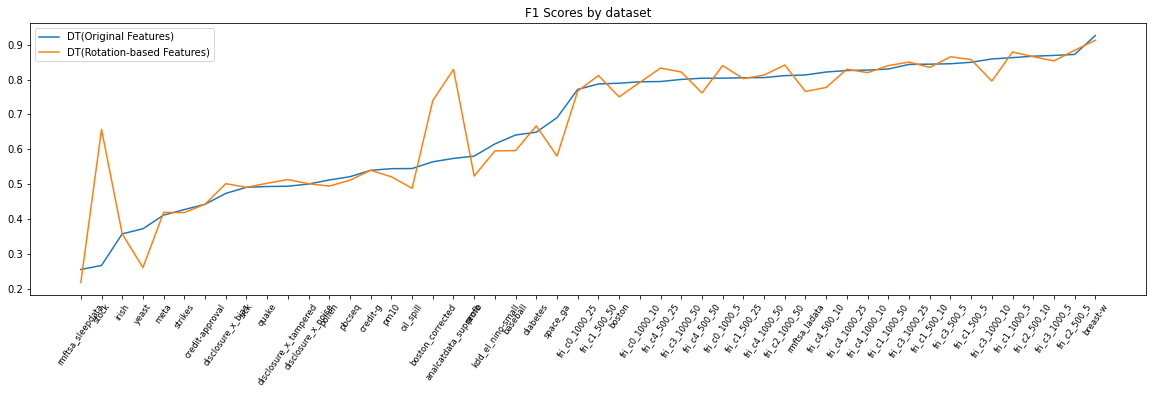

In [5]:
# Collect the set of all combinations of model type and feature engineering. In this example, there
# should just be the two.
combinations_df = summary_df.groupby(['Model', 'Feature Engineering Description']).size().reset_index()

summary_df = summary_df.dropna(subset=['Avg f1_macro'])

# Draw a single plot, with a line for each feature engineering description. Along the x-axis we have each
# dataset ordered by lowest to highest score when using the original features. 
fig_width = min(len(summary_df)/4, 20)
fig_width = max(fig_width, 5)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width,5))
for row_idx in range(len(combinations_df)):
    m = combinations_df.iloc[row_idx]['Model']
    h = combinations_df.iloc[row_idx]['Feature Engineering Description']
    
    # Get the subset of summary_df for the current feature engineering method. 
    if (row_idx==0):
        subset_df_1 = summary_df[(summary_df['Model']==m) & (summary_df['Feature Engineering Description']==h)].sort_values(by='Avg f1_macro').reset_index()
        x_coords = subset_df_1.index        
        y_coords = subset_df_1['Avg f1_macro']
    else:
        subset_df_2 = summary_df[(summary_df['Model']==m) & (summary_df['Feature Engineering Description']==h)]
        y_coords = []
        for i in range(len(subset_df_1)):
            ds = subset_df_1.iloc[i]['Dataset']
            y_coords.append(subset_df_2[subset_df_2['Dataset']==ds]['Avg f1_macro'])
    ax.plot(x_coords, y_coords, label=m + "(" + h + ")")
t = subset_df_1['Dataset']
plt.xticks(range(len(t)), t, size='small', rotation=55)            
plt.legend()
plt.title("F1 Scores by dataset")
plt.show()

## Compare with best parameters found in grid search

In [ ]:
# As this takes much longer than testing with the default parameters, we test with fewer datasets. Note though,
# run_tests_grid_search() uses CV to evaluate the grid search for the best hyperparameters, it does a train-test 
# split on the data for evaluation, so evaluates the predictions quickly, though with more variability than if
# using CV to evaluate as well. 

datasets_tester = de.DatasetsTester()

matching_datasets = datasets_tester.find_datasets(problem_type = "classification")

datasets_tester.collect_data(max_num_datasets_used=8, 
                             preview_data=False, 
                             save_local_cache=True,
                             check_local_cache=True,
                             path_local_cache=cache_folder)


orig_parameters = {
     'dt__max_depth': (3,4,5,6)
}

rota_parameters = {
     'rota__degree_increment': (4,10,15,30),
#     'dt__max_depth': (3,4,5,6)
}

orig_pipe = Pipeline([('dt', tree.DecisionTreeClassifier())])
rota_pipe = Pipeline([('rota', RotationFeatures()), ('dt', tree.DecisionTreeClassifier())])

# This provides an example using some non-default parameters. 
summary_df = datasets_tester.run_tests_grid_search(
        estimators_arr = [
            ("DT", "Original Features", "", orig_pipe),
            ("DT", "Rotation-based Features", "", rota_pipe)],
        parameters_arr=[orig_parameters, rota_parameters],
        num_cv_folds=3,
        show_warnings=False) 

display(summary_df)


c:\users\aymke\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reading from local cache: 0, id: 3, name: kr-vs-kp
Reading from local cache: 1, id: 15, name: breast-w
Reading from local cache: 2, id: 29, name: credit-approval
Reading from local cache: 3, id: 31, name: credit-g
Reading from local cache: 4, id: 37, name: diabetes
Reading from local cache: 5, id: 38, name: sick
Reading from local cache: 6, id: 50, name: tic-tac-toe
Reading from local cache: 7, id: 181, name: yeast

Running test on 8 datastets
Running tests on dataset: kr-vs-kp
	Running tests with model: DT (Original Features)
test_score:  0.9295014810613222
	Running tests with model: DT (Rotation-based Features)
test_score:  0.992457425518257
Running tests on dataset: breast-w
	Running tests with model: DT (Original Features)
test_score:  0.9546716003700277
	Running tests with model: DT (Rotation-based Features)
test_score:  0.946969696969697
Running tests on dataset: credit-approval
	Running tests with model: DT (Original Features)
test_score:  0.4632756132756133
	Running tests with 